Vamos fazer import do pomegranate e de mais algumas dependências importantes (numpy e matplotlib)

In [2]:
from pomegranate import *
import numpy as np
import matplotlib.pyplot as plt

# Inicialização de Distribuições

Uma distribuição é inicializada passando os seus parâmetros.
No caso da distribuição uniforma, a média e o desvio padrão

In [118]:
a = NormalDistribution(5,2)
a

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        5.0,
        2.0
    ],
    "frozen" : false
}

Podemos obter uma sample a partir de uma dada distribuição utilizando a função sample():

In [119]:
valor = a.sample()
print(valor)

6.309988259214761


Quando não sabemos os parâmetros da distribuição, podemos fazer o ajuste da distribuição a dados.
Para isto usamos a classe from_samples

In [6]:
b = NormalDistribution.from_samples([3,4,5,6,7])
b

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        5.0,
        1.4142135623730951
    ],
    "frozen" : false
}

Podem ser criadas distribuições multivariadas a partir de distribuições univariadas através do método IndependentComponentsDistribution e passando-lhe um array das outras distribuições

In [5]:
d1 = NormalDistribution(5, 2)
d2 = LogNormalDistribution(1, 0.3)
d3 = ExponentialDistribution(4)
d = IndependentComponentsDistribution([d1, d2, d3])
d

{
    "class" : "Distribution",
    "name" : "IndependentComponentsDistribution",
    "parameters" : [
        [
            {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    5.0,
                    2.0
                ],
                "frozen" : false
            },
            {
                "class" : "Distribution",
                "name" : "LogNormalDistribution",
                "parameters" : [
                    1.0,
                    0.3
                ],
                "frozen" : false
            },
            {
                "class" : "Distribution",
                "name" : "ExponentialDistribution",
                "parameters" : [
                    4.0
                ],
                "frozen" : false
            }
        ],
        [
            1.0,
            1.0,
            1.0
        ]
    ],
    "frozen" : false
}

Se a data for multivariada, é preciso passar uma matriz e não apenas um vetor.

In [6]:
x = numpy.random.normal(10, 1, size=(1000, 3))

d4 = MultivariateGaussianDistribution.from_samples(x)
d4.mu, d4.cov

(array([ 9.98588294, 10.01755069, 10.03791083]),
 array([[ 1.00990143e+00, -9.87537869e-02, -1.17221504e-02],
        [-9.87537869e-02,  9.45219179e-01, -3.36942655e-04],
        [-1.17221504e-02, -3.36942655e-04,  9.08922889e-01]]))

Se quisermos ajustar uma distribuição de componentes independentes a partir dos dados, podemos passar uma lista de Distribuições ao método from_samples.

In [19]:
d5 = IndependentComponentsDistribution.from_samples(x, distributions=[NormalDistribution, ExponentialDistribution, LogNormalDistribution])
d5

{
    "class" : "Distribution",
    "name" : "IndependentComponentsDistribution",
    "parameters" : [
        [
            {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    10.033116594349512,
                    1.0000648310167783
                ],
                "frozen" : false
            },
            {
                "class" : "Distribution",
                "name" : "ExponentialDistribution",
                "parameters" : [
                    0.09949057098479301
                ],
                "frozen" : false
            },
            {
                "class" : "Distribution",
                "name" : "LogNormalDistribution",
                "parameters" : [
                    2.298544345751361,
                    0.10197350209345586
                ],
                "frozen" : false
            }
        ],
        [
            1.0,
            1.0,
            1.0
  

# Probabilidades

Calcular probabilidades é também muito simples, basta usar o método probability

In [25]:
a = NormalDistribution(5,2)
prob_log = a.log_probability(5)
print(prob_log)
prob = a.probability(5)
print(prob)

-1.612085713764219
0.19947114020079593


Também podemos passar um vetor de probabilidades:

In [26]:
probs = a.probability([0,1,2,3,4,5])
print(probs)

[0.00876415 0.02699548 0.0647588  0.12098536 0.17603266 0.19947114]


Funciona da mesma forma para distribuições multivariadas:

In [30]:
x = numpy.random.normal(10, 1, size=(1000, 3))

d7 = MultivariateGaussianDistribution.from_samples(x)

d7.probability([[9,10,11]])

0.023475745551042353

Para as distribuições de Componentes Independentes a probabilidade é a multiplicação das probabilidades para as 3 dimensões:

In [32]:
d5.distributions[0].probability(9)*d5.distributions[1].probability(9)*d5.distributions[2].probability(9)

0.0025226704869167945

# Representar graficamente uma distribuição

Podemos usar o método plot, que escolhe samples aleatoriamente a partir do modelo e faz o histograma dessas samples:

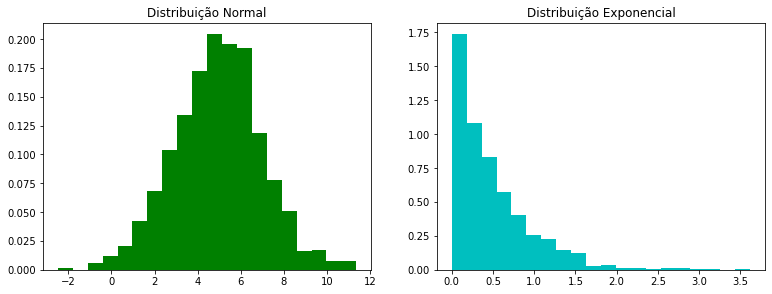

In [45]:
a = NormalDistribution(5,2)
b = ExponentialDistribution(2)

plt.figure(figsize = (20,10))
plt.subplot(231)
plt.title("Distribuição Normal")
a.plot(1000,color = "g",density=True,bins=20)

plt.subplot(232)
plt.title("Distribuição Exponencial")
b.plot(1000,color = "c",density=True,bins=20)
plt.show()

Outra forma de o fazer é calcular a probabilidade para cada ponto ao longo de um array e fazer o gráfico dessas probabilidades.

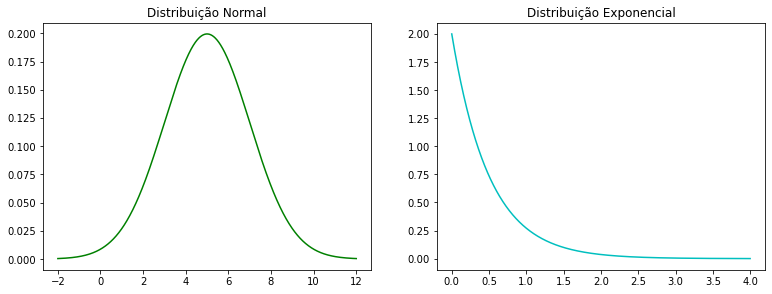

In [48]:
xa = np.linspace(-2,12,1000)
xb = np.linspace(0,4,1000)

plt.figure(figsize = (20,10))
plt.subplot(231)
plt.title("Distribuição Normal")
plt.plot(xa,a.probability(xa),color = "g")

plt.subplot(232)
plt.title("Distribuição Exponencial")
plt.plot(xb,b.probability(xb),color = "c")
plt.show()

# Fitting

Podemos querer ajustar a distribuição a novos dados.
As distribuições são atualizadas usando a máxima verosimilhança e o kernel descarta os valores atuais da distribuição a não ser que se defina uma inércia, que define a proporção a usar da distribuição original, que por default tem o valor 0.

In [55]:
X = numpy.random.normal(6,2,size=1000)

e = NormalDistribution(100,2)
e.fit(X)
e

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        5.982320081106476,
        2.016860695906934
    ],
    "frozen" : false
}

In [56]:
e = NormalDistribution(100,2)
e.fit(X,inertia=0.5)
e

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        52.99116004055324,
        2.008430347953467
    ],
    "frozen" : false
}

Também podemos passar um array com os pesos juntamente com os dados:

In [9]:
%timeit
e = NormalDistribution(5,2)
e.fit([1, 5, 7, 3, 2, 4], weights=[0.5, 0.75, 1, 1.25, 1.8, 0.33])
e

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        3.538188277087034,
        1.954149818564894
    ],
    "frozen" : false
}

# Distribuições Discretas

Para criar distribuições discretas, passamos um dicionário onde as keys podem ser qualquer objeto e os valores são a probabilidade de eles ocorrerem:

In [59]:
d = DiscreteDistribution({"Cara":0.3,"Coroa":0.7})
print(d.probability("Cara"))
print(d.probability("Coroa"))
print(d.probability("bola"))

0.3
0.7
0.0


In [65]:
X = list("AAABBB")
d.fit(X)
print(d.probability("A"))
print(d.probability("B"))

0.5
0.5


# Velocidade

Em termos de velocidade, o pomegranate consegue manter-se na mesma magnitude que o numpy, que é uma biblioteca super otimizada. Por exemplo, ajustando uma distribuição normal a 1000 samples:

In [69]:
X = numpy.random.normal(4, 1, size=1000)

%timeit numpy.mean(X), numpy.std(X)
%timeit NormalDistribution.from_samples(X)

114 µs ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
52.8 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Agora, aumentando o número de samples para 1 milhão:

In [64]:
X = numpy.random.normal(4, 1, size=10000000)

%timeit numpy.mean(X), numpy.std(X)
%timeit NormalDistribution.from_samples(X)

198 ms ± 26.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
231 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Agora vamos ajustar uma distribuição gaussiana multivariada a 1 milhão de samples em 3 dimensões. Como o pomegranate é escrito em Cython, pode usar o BLAS, aumentando a velocidade.

In [70]:
X = numpy.random.normal(4, 1, size=(1000000, 3))

%timeit numpy.mean(X, axis=0), numpy.cov(X, rowvar=False, ddof=0)
%timeit MultivariateGaussianDistribution.from_samples(X)

157 ms ± 21.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
92.8 ms ± 5.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Modelos de mistura Gerais

Vamos imaginar que temos dados complexos que não parecem corresponder a nenhuma das distribuições simples.

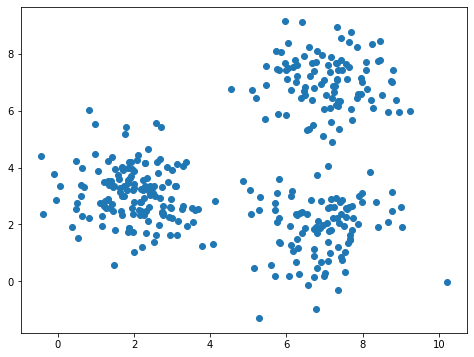

In [121]:
X = numpy.concatenate([numpy.random.normal((7, 2), 1, size=(100, 2)),
                       numpy.random.normal((2, 3), 1, size=(150, 2)),
                       numpy.random.normal((7, 7), 1, size=(100, 2))])

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1])
plt.show()

Estes dados parecem corresponder a 3 conjuntos diferentes, logo podemos criar um modelo de misturas gerais e defini-lo como uma mistura de 3 distribuições gaussianas.

In [122]:
model = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 3, X)

Agora podemos ver as probabilidades de densidades caso tivéssemos usado apenas 1 distribuição gaussiana versos a mistura das 3 gaussianas.
Nota: Mais escuro = maior densidade de probabilidade
É fácil de verificar que o modelo de misturas é melhor que a distribuição simples

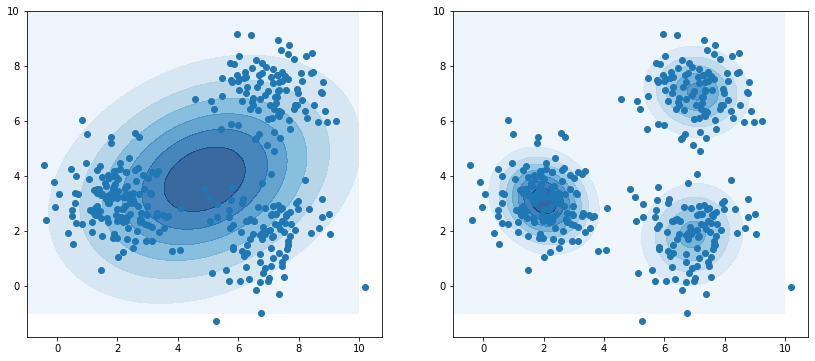

In [123]:
x = numpy.arange(-1, 10.1, .1)
y = numpy.arange(-1, 10.1, .1)

xx, yy = numpy.meshgrid(x, y)
x_ = numpy.array(list(zip(xx.flatten(), yy.flatten())))

p1 = MultivariateGaussianDistribution.from_samples(X).probability(x_).reshape(len(x), len(y))
p2 = model.probability(x_).reshape(len(x), len(y))


plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.contourf(xx, yy, p1, cmap='Blues', alpha=0.8)
plt.scatter(X[:,0], X[:,1])

plt.subplot(122)
plt.contourf(xx, yy, p2, cmap='Blues', alpha=0.8)
plt.scatter(X[:,0], X[:,1])
plt.show()

# Exemplos e Comparação com WebPPL

Exercício 1 da Ficha 3: Assuma que 1% da população tem COVID. Dos que têm COVID, 70% tem um teste rápido positivo mas 10% das pessoas que não têm COVID tem um teste rápido positivo. Imprima o histograma correspondente aos positivos;

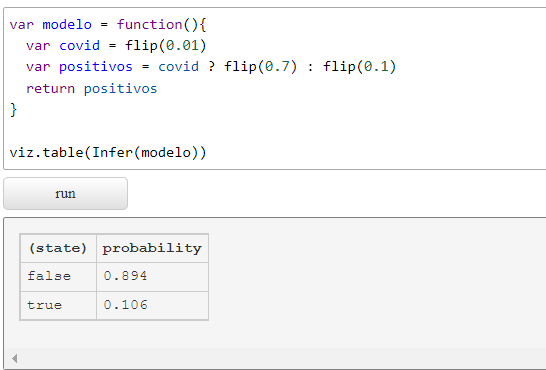

A probabilidade do teste ser positivo é de:  0.1025
A probabilidade do teste ser negativo é de:  0.8975


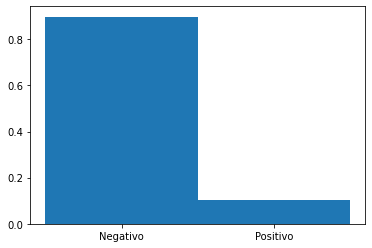

In [73]:
#Exercício1 Ficha3

def modelo():
    coviddist = DiscreteDistribution({"Covid":0.01,"Saudavel":0.99})
    teste_covid = DiscreteDistribution({"Positivo":0.70,"Negativo":0.30})
    teste_saudavel = DiscreteDistribution({"Positivo":0.10,"Negativo":0.90})
    if coviddist.sample() == "Covid":
        return teste_covid.sample()
    else:
        return teste_saudavel.sample()
    
lista = []
numero_samples = 10000
count_pos = 0
for i in range(numero_samples):
    result = modelo()
    lista.append(result)
    if result == "Positivo":
        count_pos +=1

count_neg = numero_samples-count_pos

prob_pos = count_pos/numero_samples
prob_neg = count_neg/numero_samples
print("A probabilidade do teste ser positivo é de: ",prob_pos)
print("A probabilidade do teste ser negativo é de: ",prob_neg)


plt.hist(lista,density=True,bins=[0,1,2],align="left")
plt.show()

Também Podemos resolver o exercício utilizando as Independent Components Distributions:

In [64]:
covid_dist = DiscreteDistribution({"Covid":0.01,"Saudavel":0.99})
teste_covid = DiscreteDistribution({"Positivo":0.70,"Negativo":0.30})
teste_saudavel = DiscreteDistribution({"Positivo":0.10,"Negativo":0.90})

dist = IndependentComponentsDistribution(distributions=[covid_dist,teste_covid,teste_saudavel])

prob_positivo = dist.distributions[0].probability("Covid")*dist.distributions[1].probability("Positivo") + dist.distributions[0].probability("Saudavel")*dist.distributions[2].probability("Positivo")
prob_negativo = dist.distributions[0].probability("Covid")*dist.distributions[1].probability("Negativo") + dist.distributions[0].probability("Saudavel")*dist.distributions[2].probability("Negativo")
print("A probabilidade do resultado do teste ser positivo é: ",prob_positivo)
print("A probabilidade do resultado do teste ser negativo é: ",prob_negativo)

A probabilidade do resultado do teste ser positivo é:  0.10600000000000001
A probabilidade do resultado do teste ser negativo é:  0.894


Exercício 2 Ficha 3: Assuma agora que existe o teste B (em oposição ao teste A referido acima) em que 90% das pessoas com COVID tem um teste positivo enquanto que só 1% das pessoas sem COVID tem um teste positivo. Assuma também que das pessoas que ligam para o Saúde24, 80% das pessoas fizeram o teste A e as restantes fizeram o teste B. Imprima o histograma correspondente aos positivos.

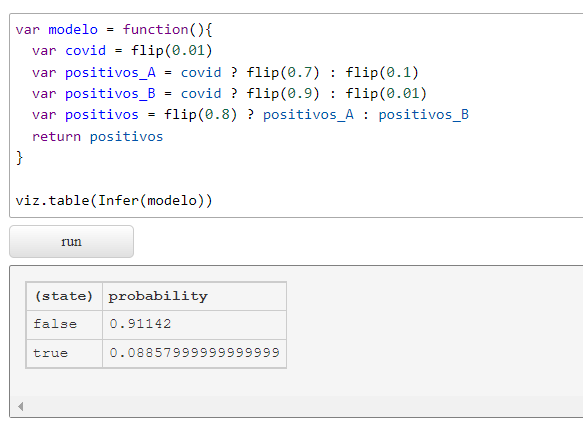

A probabilidade do teste ser positivo é de:  0.0791
A probabilidade do teste ser negativo é de:  0.9209


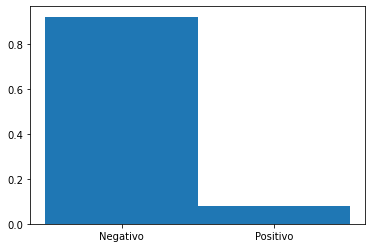

In [72]:
#Exercício 2 Ficha

def modelo():
    coviddist = DiscreteDistribution({"Covid":0.01,"Saudavel":0.99})
    testeA_covid = DiscreteDistribution({"Positivo":0.70,"Negativo":0.30})
    testeA_saudavel = DiscreteDistribution({"Positivo":0.10,"Negativo":0.90})
    testeB_covid = DiscreteDistribution({"Positivo":0.9,"Negativo":0.10})
    testeB_saudavel = DiscreteDistribution({"Positivo":0.01,"Negativo":0.99})
    positivos = DiscreteDistribution({"A":0.80,"B":0.20})
    
    if positivos.sample() == "A":
        if coviddist.sample == "Covid":
            return testeA_covid.sample()
        else:
            return testeA_saudavel.sample()
    else:
        if coviddist.sample() == "Covid":
            return testeB_covid.sample()
        else:
            return testeB_saudavel.sample()

lista = []
numero_samples = 10000
count_pos = 0
for i in range(numero_samples):
    result = modelo()
    lista.append(result)
    if result == "Positivo":
        count_pos +=1

count_neg = numero_samples-count_pos

prob_pos = count_pos/numero_samples
prob_neg = count_neg/numero_samples
print("A probabilidade do teste ser positivo é de: ",prob_pos)
print("A probabilidade do teste ser negativo é de: ",prob_neg)


plt.hist(lista,density=True,bins=[0,1,2],align="left")
plt.show()

Exercício 3 Ficha 3: Calcule p(COVID|positivo) para a pergunta 1 da ficha 3;

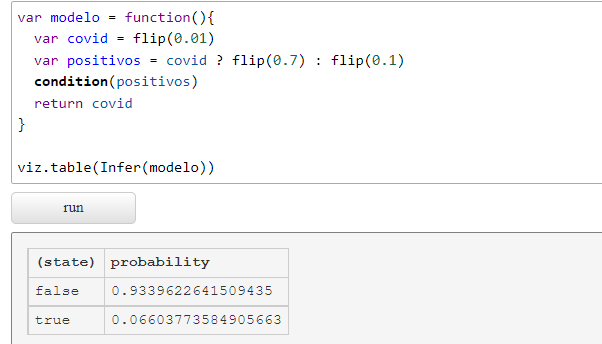

A probabilidade de ter covid é de:  0.06384976525821597
A probabilidade de ser saudável é de:  0.936150234741784


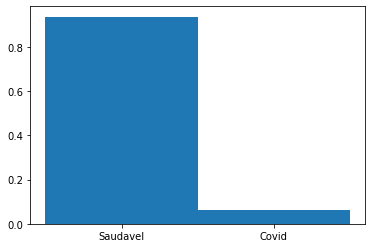

In [116]:
# Exercício 3

def modelo():
    coviddist = DiscreteDistribution({"Covid":0.01,"Saudavel":0.99})
    teste_covid = DiscreteDistribution({"Positivo":0.70,"Negativo":0.30})
    teste_saudavel = DiscreteDistribution({"Positivo":0.10,"Negativo":0.90})
    covid = coviddist.sample()
    if covid == "Covid":
        resultado = teste_covid.sample()
    else:
        resultado = teste_saudavel.sample()
    if resultado == "Positivo":
        return covid
    
lista = []
count_covid = 0
numero_samples = 50000
for i in range(numero_samples):
    result = modelo()
    if result != None:
        lista.append(result)
        if result == "Covid":
            count_covid +=1

count_sau = len(lista)-count_covid

prob_covid = count_covid/len(lista)
prob_sau = count_sau/len(lista)
print("A probabilidade de ter covid é de: ",prob_covid)
print("A probabilidade de ser saudável é de: ",prob_sau)

plt.hist(lista,density=True,bins=[0,1,2],align="left")
plt.show()